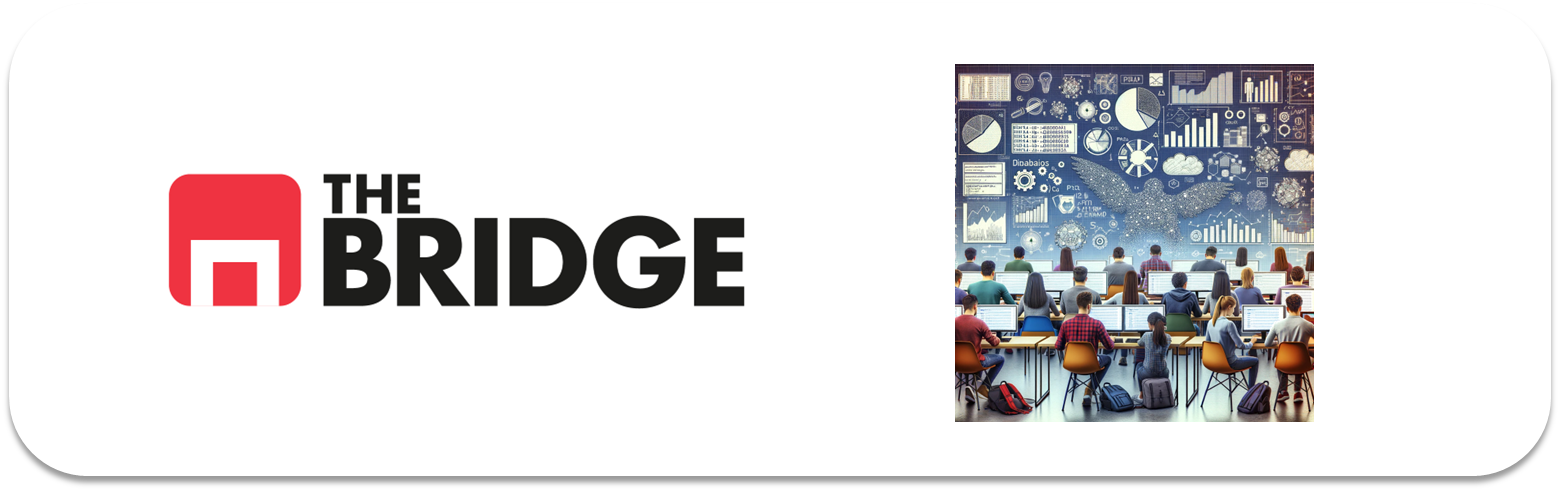

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model, metrics, model_selection
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso

# 1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.

In [29]:
df_boston = pd.read_csv('data/hard_to_find/obligatoria_hard.csv')

In [30]:
df_boston.head()

,CRIM|ZN|INDUS|CHAS|NOX|RM|AGE|DIS|RAD|TAX|PTRATIO|LSTAT|MEDV
0,0.00632|18.0|2.31|0.0|0.538|6.575|65.2|4.09|1....
1,0.02731|0.0|7.07|0.0|0.469|6.421|78.9|4.9671|2...
2,0.02729|0.0|7.07|0.0|0.469|7.185|61.1|4.9671|2...
3,0.03237|0.0|2.18|0.0|0.458|6.998|45.8|6.0622|3...
4,0.06905|0.0|2.18|0.0|0.458|7.147|54.2|6.0622|3...


In [31]:
df_boston = df_boston['CRIM|ZN|INDUS|CHAS|NOX|RM|AGE|DIS|RAD|TAX|PTRATIO|LSTAT|MEDV'].str.split('|', expand=True)


# Renombra las columnas resultantes si es necesario
df_boston.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']

df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.12,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [32]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CRIM     506 non-null    object
 1   ZN       506 non-null    object
 2   INDUS    506 non-null    object
 3   CHAS     506 non-null    object
 4   NOX      506 non-null    object
 5   RM       506 non-null    object
 6   AGE      506 non-null    object
 7   DIS      506 non-null    object
 8   RAD      506 non-null    object
 9   TAX      506 non-null    object
 10  PTRATIO  506 non-null    object
 11  LSTAT    506 non-null    object
 12  MEDV     506 non-null    object
dtypes: object(13)
memory usage: 51.5+ KB


In [33]:
df_boston = df_boston.apply(pd.to_numeric)

# 2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión

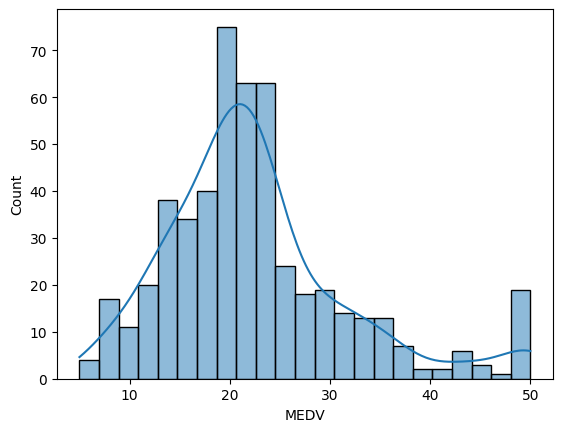

In [34]:
sns.histplot(df_boston["MEDV"], kde= True);

# 3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.

In [35]:
train_set, test_set = train_test_split(df_boston, test_size=0.2, random_state=42)

# 4. Construye las parejas X,y de train y test

In [36]:
X_train = train_set.drop('MEDV', axis = 1)  # Train de Features, sacando la variable Target
y_train = train_set['MEDV']					# Train de Target
X_test = test_set.drop('MEDV', axis = 1)	# Test de Features, sacando la variable Target
y_test = test_set['MEDV']					# Test de Target


# 5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.

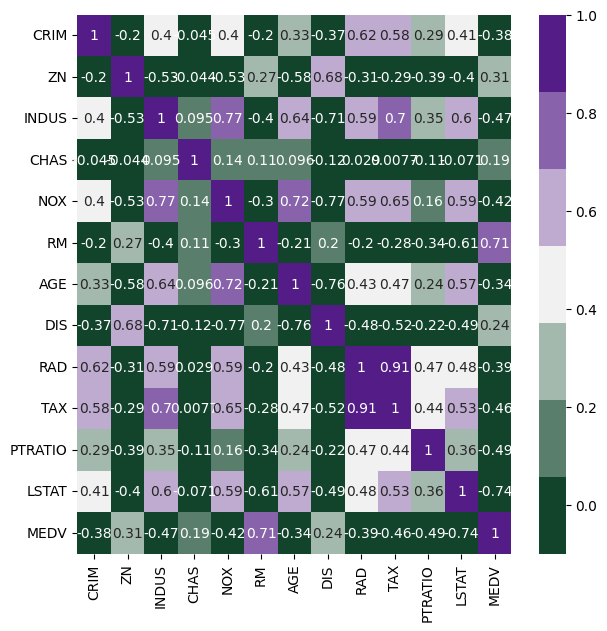

In [37]:
plt.figure(figsize=(7,7))
sns.heatmap(train_set.corr(),
           vmin=-0.1,
           vmax=1,
           cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
           annot=True);

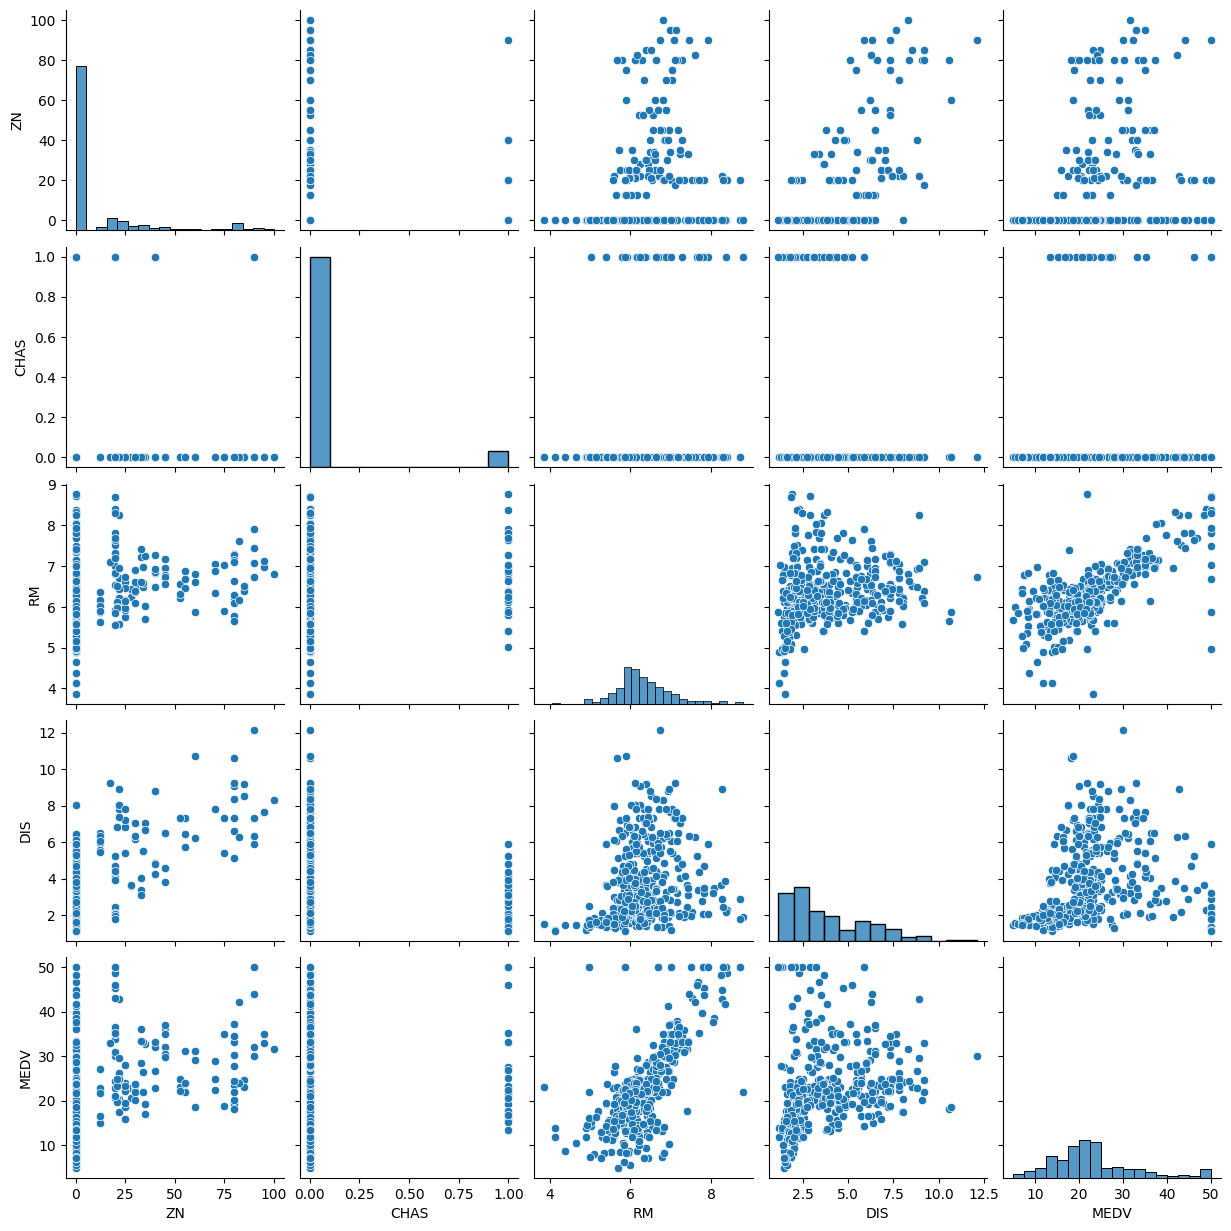

In [38]:
# Paso 1
corr_matrix = train_set.corr(numeric_only= True)
corr_matrix["MEDV"].sort_values(ascending = False)

columnas = corr_matrix["MEDV"][corr_matrix["MEDV"] > 0.05].index.to_list()
sns.pairplot(train_set[columnas])


### Nos quedamos con las Features 'RM' y 'DIS', que parecen tener una mayor correlación lineal, además de 'LSTAT' por su alto coeficiente negativo.

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

In [39]:
features_train = ['RM', 'DIS', 'LSTAT']
X_train = X_train[features_train]
X_train

,RM,DIS,LSTAT
477,5.304,2.1007,24.91
15,5.834,4.4986,8.47
332,6.031,6.6407,7.83
423,6.103,2.0218,23.29
19,5.727,3.7965,11.28
...,...,...,...
106,5.836,2.2110,18.66
270,5.856,4.4290,13.00
348,6.635,8.3440,5.99
435,6.629,2.1247,23.27


array([[<Axes: title={'center': 'RM'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'LSTAT'}>, <Axes: >]], dtype=object)

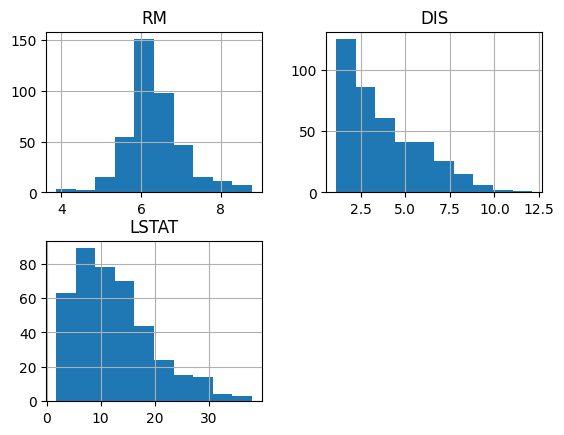

In [40]:
X_train.hist()

In [41]:
X_train.describe()

,RM,DIS,LSTAT
count,404.000000,404.000000,404.000000
mean,6.315891,3.808195,12.457351
std,0.709452,2.131226,7.110381
min,3.863000,1.129600,1.730000
25%,5.890500,2.087875,6.772500
50%,6.210000,3.175750,10.925000
75%,6.636750,5.400800,16.372500
max,8.780000,12.126500,37.970000


# 6. Trata las variables para que funcionen lo mejor posible en el modelo.

In [42]:
'''
min_max_scaler_train = MinMaxScaler(feature_range=(-1, 1))
resultado_min_max_train = pd.DataFrame(min_max_scaler_train.fit_transform(X_train), columns= features_train)

resultado_min_max_train.hist()
'''

'\nmin_max_scaler_train = MinMaxScaler(feature_range=(-1, 1))\nresultado_min_max_train = pd.DataFrame(min_max_scaler_train.fit_transform(X_train), columns= features_train)\n\nresultado_min_max_train.hist()\n'

array([[<Axes: title={'center': 'RM'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'LSTAT'}>, <Axes: >]], dtype=object)

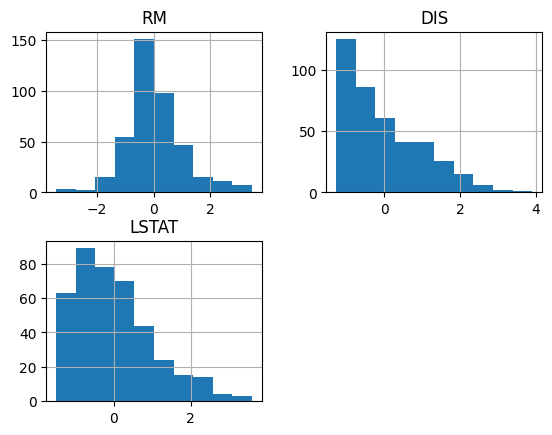

In [43]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
resultado_standardization_train = pd.DataFrame(std_scaler.fit_transform(X_train),columns = features_train)

resultado_standardization_train.hist()


In [44]:
X_train = resultado_standardization_train

# 7. Construye un modelo de regresión lineal.

In [52]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

a = lin_reg.predict(X_train)

# 8. Analiza si lo crees conveniente los pesos y la importancia de las features.

In [46]:
# parámetro w0, también conocido como intercept, y que nos da el valor para el caso de que los valores de todas las features sea 0:
print(lin_reg.intercept_)
print(lin_reg.coef_)


22.796534653465343
[ 3.69041217 -1.08422054 -5.13983554]


In [47]:
intercept = lin_reg.intercept_
coefs = lin_reg.coef_.ravel()

features = pd.DataFrame(coefs, X_train.columns, columns=['coefficient']).copy()
features['coefficient'] = np.abs(features['coefficient'])

features.sort_values('coefficient', ascending=False).head()

,coefficient
LSTAT,5.139836
RM,3.690412
DIS,1.084221


# 9. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.

In [58]:
# Aplicamos los mismos cambios que X_train a X_test
features_test = ['RM', 'DIS', 'LSTAT']
X_test = X_test[features_test]

# min_max_scaler_test = MinMaxScaler(feature_range=(-1, 1))
# resultado_min_max_test = pd.DataFrame(min_max_scaler_test.fit_transform(X_test), columns= features_test)

std_scaler_test = StandardScaler()
resultado_standardization_test = pd.DataFrame(std_scaler.fit_transform(X_test),columns = features_test)
X_test = resultado_standardization_test

In [59]:
# La predicción 

train_pred = metrics.mean_squared_error(lin_reg.predict(X_train), y_train)
test_pred = metrics.mean_squared_error(lin_reg.predict(X_test), y_test)


# MSE o Error Cuadrático Medio de Train respecto a Test
print("Train MSE:", train_pred)
print("Test MSE:", test_pred)



Train MSE: 29.524961342702863
Test MSE: 33.51394464087583


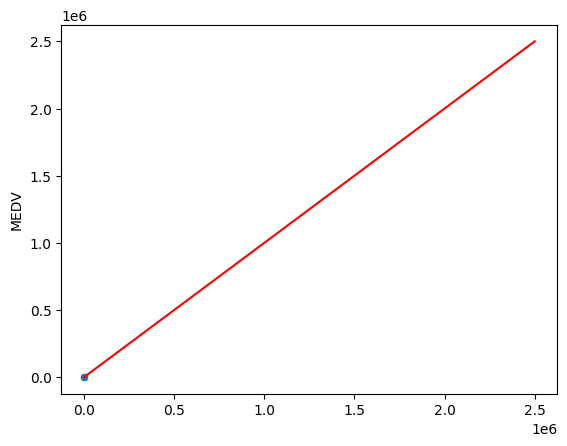

In [62]:
# Predicción gráfica (OPC.)
sns.scatterplot(x=train_pred ,y=y_test);
plt.plot([0,2.5e6],[0,2.5e6],'red')
plt.show()

# 10. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.

# 11. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?